<a href="https://colab.research.google.com/github/mingshey/python_wave/blob/main/Wave1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install scienceplots

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

Set plot style to use in a document.

In [5]:
plt.style.use(['science', 'grid', 'ieee', 'no-latex'])

In [6]:
Nx = 500
Nt = 500
xs = np.linspace(0,5,Nx+1)    # x 구간
ts = np.linspace(0,1.5,Nt+1)  # t 구간

In [7]:
def wave(x, t, sign=1, amp=1, lamda=1, period=1):
  '''
  파동 함수
  sign: 파동 진행 방향 (+/-)
  amp: 진폭
  lamda: 파장
  period: 주기
  '''
  tau = 2 * np.pi
  k = tau / lamda
  omega = tau / period
  return amp * np.cos(k * x - sign * omega * t)

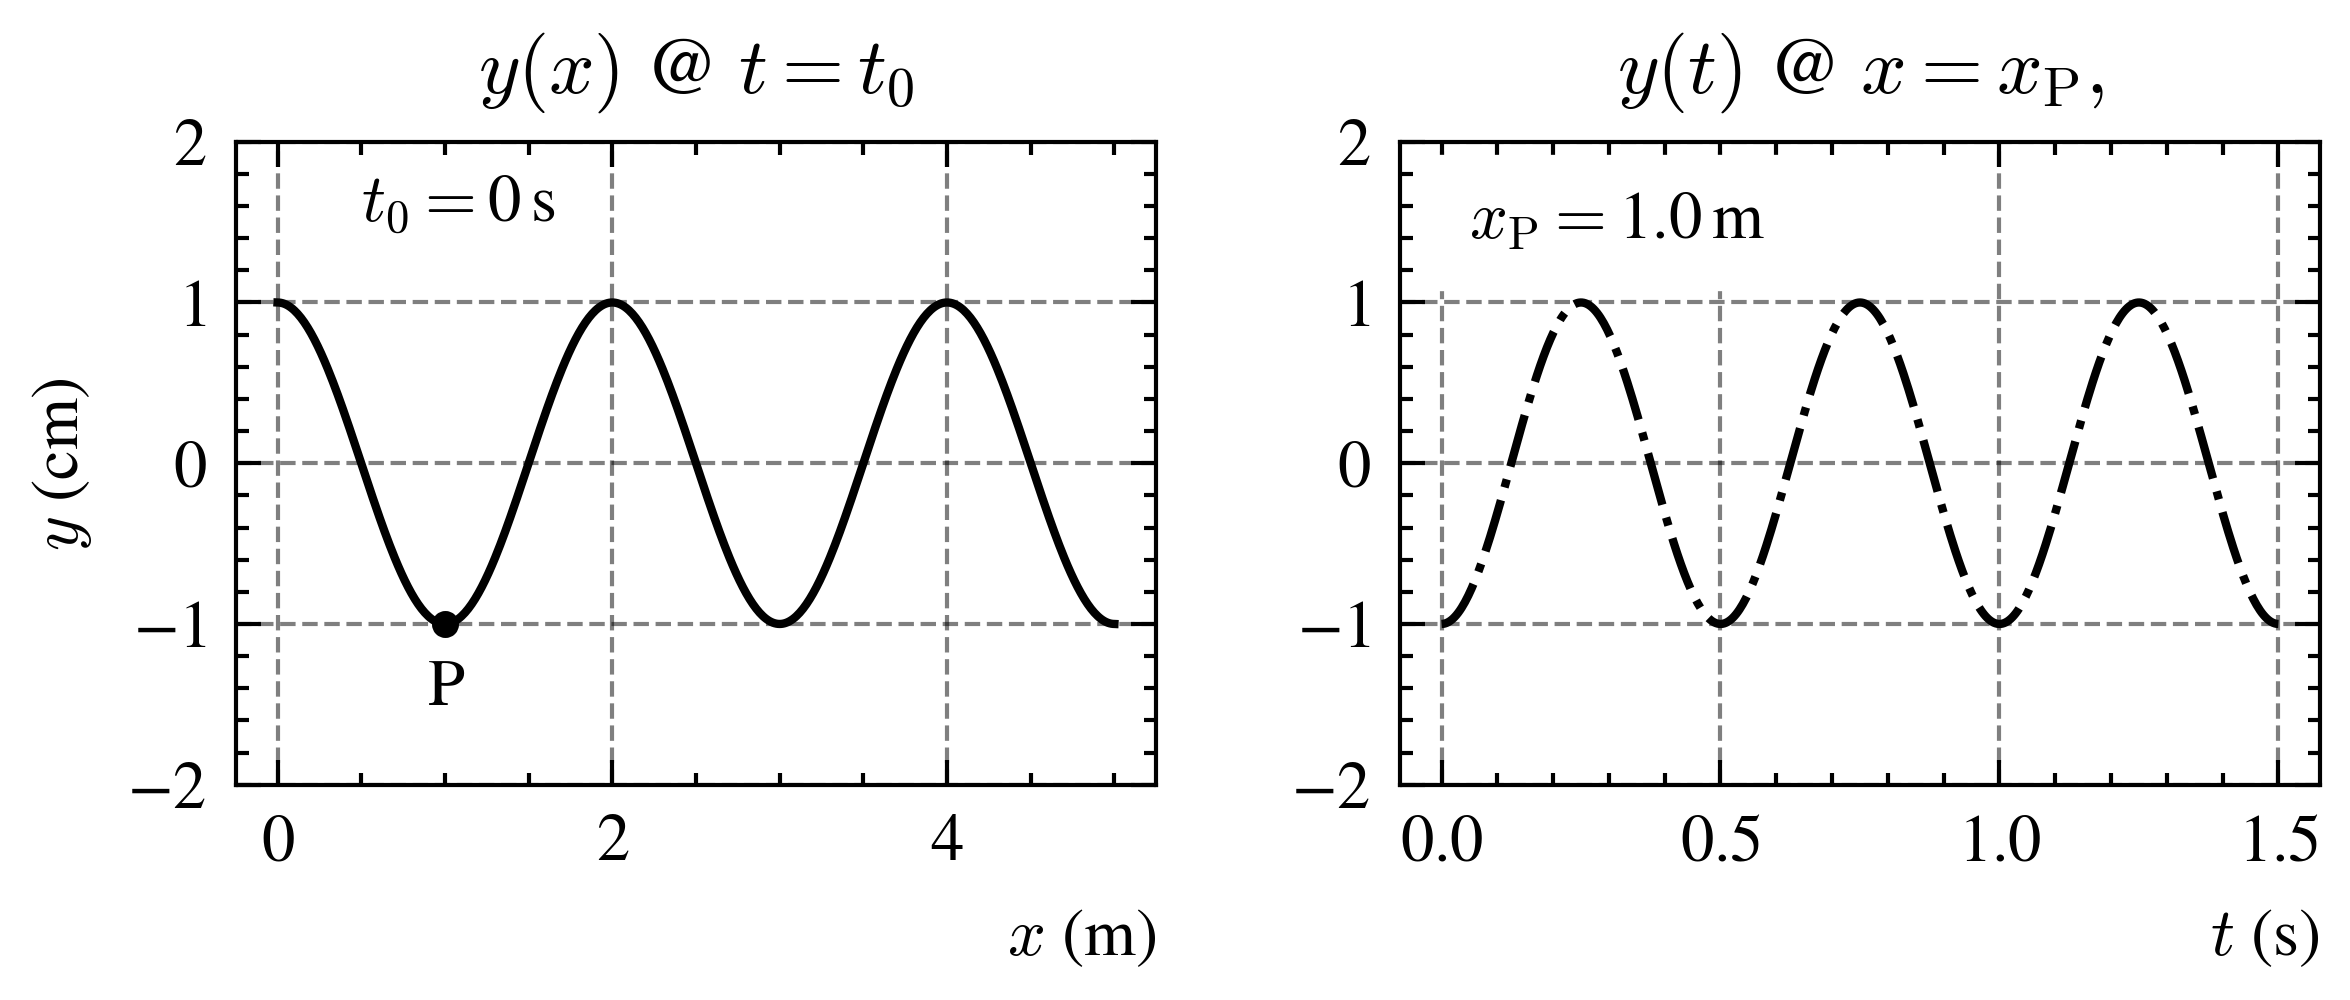

In [11]:
T = 0.5 # 주기
WL = 2  # 파장
F = 1/T # 진동수
t0 = 0  # Snapshot 시각
x0 = 1  # 점 P의 x 좌표

fig, ax = plt.subplots(1,2,figsize=(4,1.5))
fig.tight_layout()
'''
왼쪽 그래프: 파동을 t = t0 에 순간포착(snapshot)한 모습
오른쪽 그래프: x = x0인 표본점 P의 시간에 다른 진동
'''
# Snapshot
ax[0].set_ylim(-2,2)
ax[0].set_xlabel(r"$x$ (m)", loc='right')
ax[0].set_ylabel(r"$y$ (cm)")
ax[0].set_title(r"$y(x)$ @ $t=t_{\rm 0}$")
ax[0].plot(xs, wave(xs, t0, lamda=WL, period=T))
ax[0].text(0.5, 1.5, r'$t_{\rm 0}=$'+f'{t0}'+r'$\,$s')
# 표본점 P(x0, y(x0, t0)) 표시
ax[0].scatter(x0, wave(x0, t0, lamda=WL, period=T), s=5)
xy = (x0, wave(x0, t0, lamda=WL, period=T))
xytext = (x0 - 0.1, xy[1] - 0.5)
ax[0].annotate('P', xy=xy, xytext=xytext, textcoords='data')

# Oscillation of sample point P
ax[1].set_ylim(-2,2)
ax[1].set_xlabel(r"$t$ (s)", loc='right')
ax[1].set_title(r"$y(t)$ @ $x=x_{\rm P},$")
ax[1].plot(ts, wave(x0, ts, lamda=WL, period=T), ls='-.')
ax[1].text(0.05, 1.4, r'$x_{\rm P}=$'+f'{x0:.1f}'+r'$\,$m', backgroundcolor='w')

plt.savefig("wave1d.svg")